In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define paths
dataset_path = "/content/drive/MyDrive/FE project/feature engineering project"
categories = os.listdir(dataset_path)

In [ ]:

data = []
labels = []

# Load and preprocess images
for idx, category in enumerate(categories):
    folder_path = os.path.join(dataset_path, category)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        try:
            img = cv2.imread(img_path)
            img = cv2.resize(img, (450, 600))  # Resize images to 450x600
            data.append(img)
            labels.append(idx)  # Assign numeric label for the category
        except Exception as e:
            print(f"Error loading image: {img_name} - {e}")

# Convert to NumPy arrays
data = np.array(data)
labels = np.array(labels)
class_names = categories


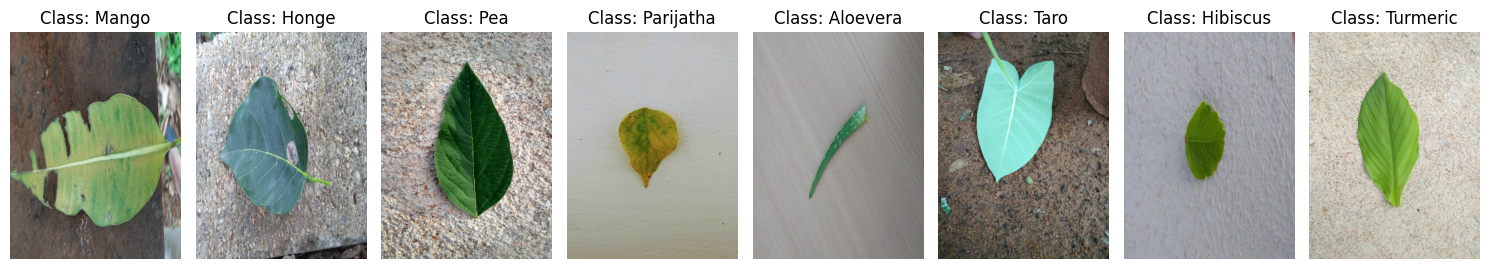

In [ ]:

unique_labels = np.unique(labels)
fig, axes = plt.subplots(1, len(unique_labels), figsize=(15, 5))

for idx, label in enumerate(unique_labels):
    # Find the first image with the current label
    img_index = np.where(labels == label)[0][0]
    img = data[img_index]

    # Plot the image
    axes[idx].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for proper color display
    axes[idx].set_title(f"Class: {categories[label]}")
    axes[idx].axis('off')

plt.tight_layout()
plt.show()


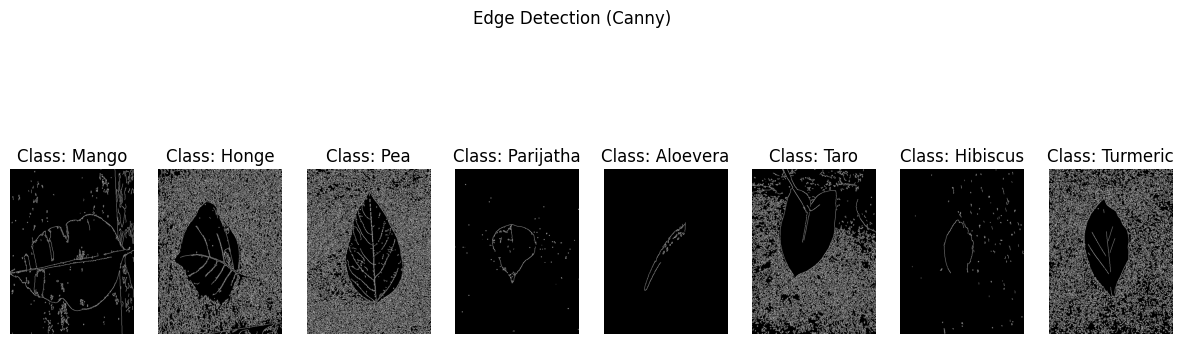

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
for idx, category in enumerate(categories):
    img_index = np.where(labels == idx)[0][0]
    gray_img = cv2.cvtColor(data[img_index], cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray_img, 100, 200)

    plt.subplot(1, len(categories), idx + 1)
    plt.imshow(edges, cmap='gray')
    plt.title(f"Class: {category}")
    plt.axis('off')

plt.suptitle("Edge Detection (Canny)")
plt.show()


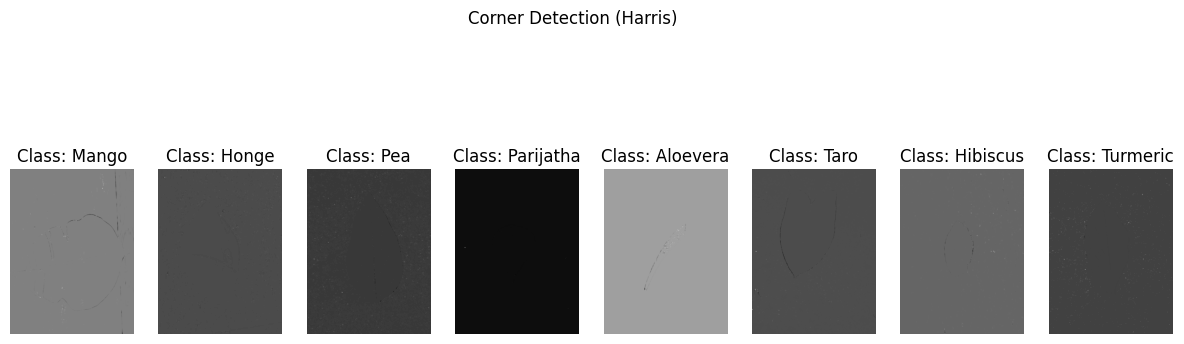

In [ ]:
plt.figure(figsize=(15, 5))
for idx, category in enumerate(categories):
    img_index = np.where(labels == idx)[0][0]
    gray_img = cv2.cvtColor(data[img_index], cv2.COLOR_BGR2GRAY)
    harris_corners = cv2.cornerHarris(np.float32(gray_img), 2, 3, 0.04)

    plt.subplot(1, len(categories), idx + 1)
    plt.imshow(harris_corners, cmap='gray')
    plt.title(f"Class: {category}")
    plt.axis('off')

plt.suptitle("Corner Detection (Harris)")
plt.show()


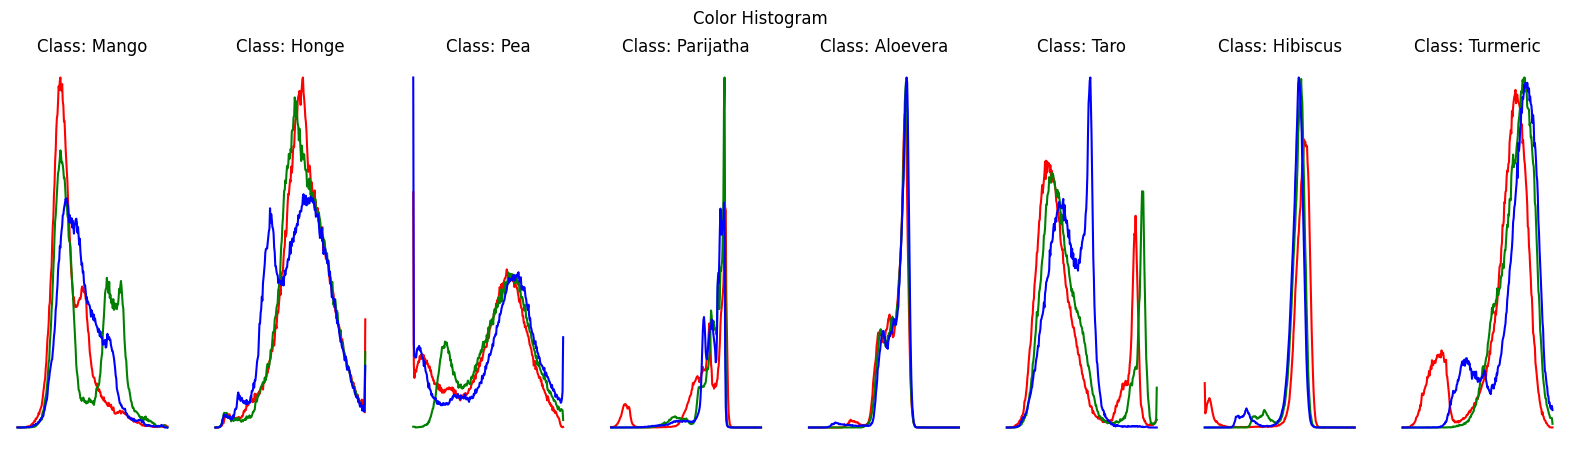

In [ ]:
plt.figure(figsize=(20, 5))
for idx, category in enumerate(categories):
    img_index = np.where(labels == idx)[0][0]
    img = data[img_index]

    plt.subplot(1, len(categories), idx + 1)
    for i, color in enumerate(['r', 'g', 'b']):
        hist = cv2.calcHist([img], [i], None, [256], [0, 256])
        plt.plot(hist, color=color)
    plt.title(f"Class: {category}")
    plt.axis('off')

plt.suptitle("Color Histogram")
plt.show()


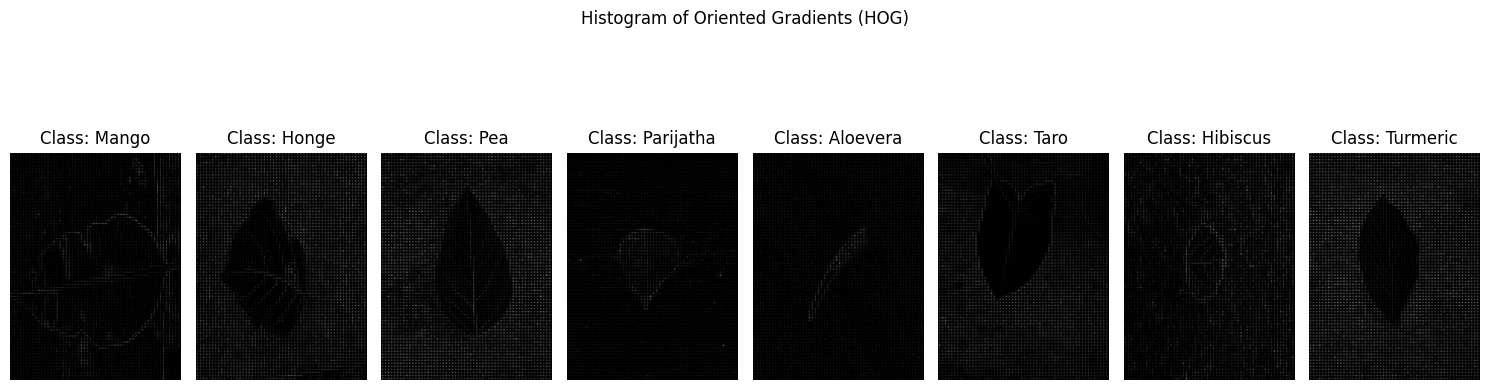

In [ ]:
from skimage.feature import hog

plt.figure(figsize=(15, 5))
for idx, category in enumerate(categories):
    img_index = np.where(labels == idx)[0][0]
    gray_img = cv2.cvtColor(data[img_index], cv2.COLOR_BGR2GRAY)

    # Compute HOG features and visualize
    _, hog_image = hog(
        gray_img,
        orientations=9,
        pixels_per_cell=(8, 8),
        cells_per_block=(2, 2),
        visualize=True
    )

    plt.subplot(1, len(categories), idx + 1)
    plt.imshow(hog_image, cmap='gray')
    plt.title(f"Class: {category}")
    plt.axis('off')

plt.suptitle("Histogram of Oriented Gradients (HOG)")
plt.tight_layout()
plt.show()


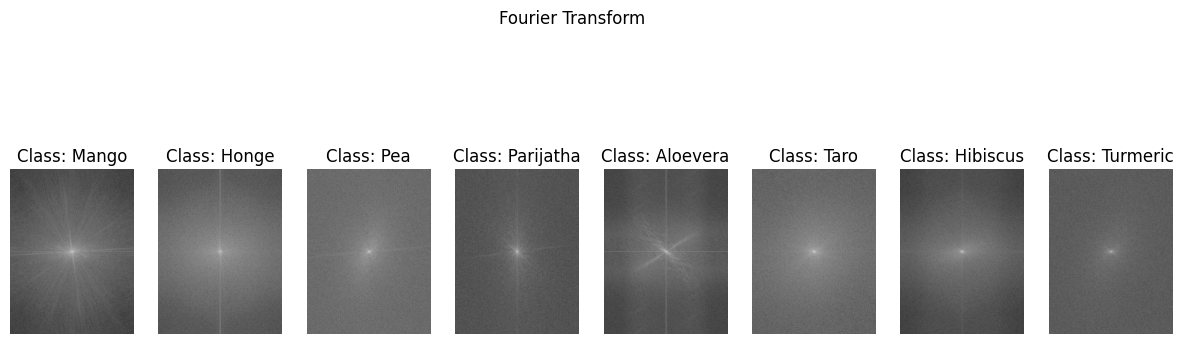

In [ ]:
plt.figure(figsize=(15, 5))
for idx, category in enumerate(categories):
    img_index = np.where(labels == idx)[0][0]
    gray_img = cv2.cvtColor(data[img_index], cv2.COLOR_BGR2GRAY)
    f_transform = np.fft.fft2(gray_img)
    f_shift = np.fft.fftshift(f_transform)
    magnitude_spectrum = 20 * np.log(np.abs(f_shift))

    plt.subplot(1, len(categories), idx + 1)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title(f"Class: {category}")
    plt.axis('off')

plt.suptitle("Fourier Transform")
plt.show()


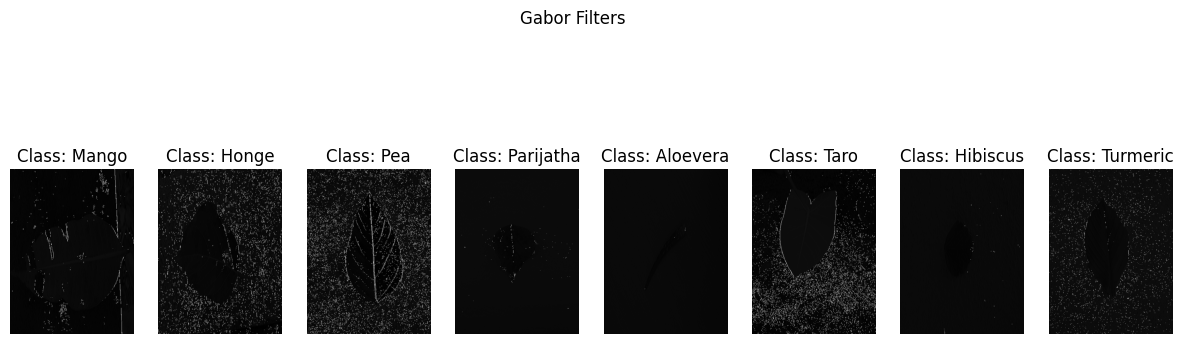

In [ ]:
from skimage.filters import gabor

plt.figure(figsize=(15, 5))
for idx, category in enumerate(categories):
    img_index = np.where(labels == idx)[0][0]
    gray_img = cv2.cvtColor(data[img_index], cv2.COLOR_BGR2GRAY)
    gabor_features, _ = gabor(gray_img, frequency=0.6)

    plt.subplot(1, len(categories), idx + 1)
    plt.imshow(gabor_features, cmap='gray')
    plt.title(f"Class: {category}")
    plt.axis('off')

plt.suptitle("Gabor Filters")
plt.show()


In [ ]:
!pip install mahotas


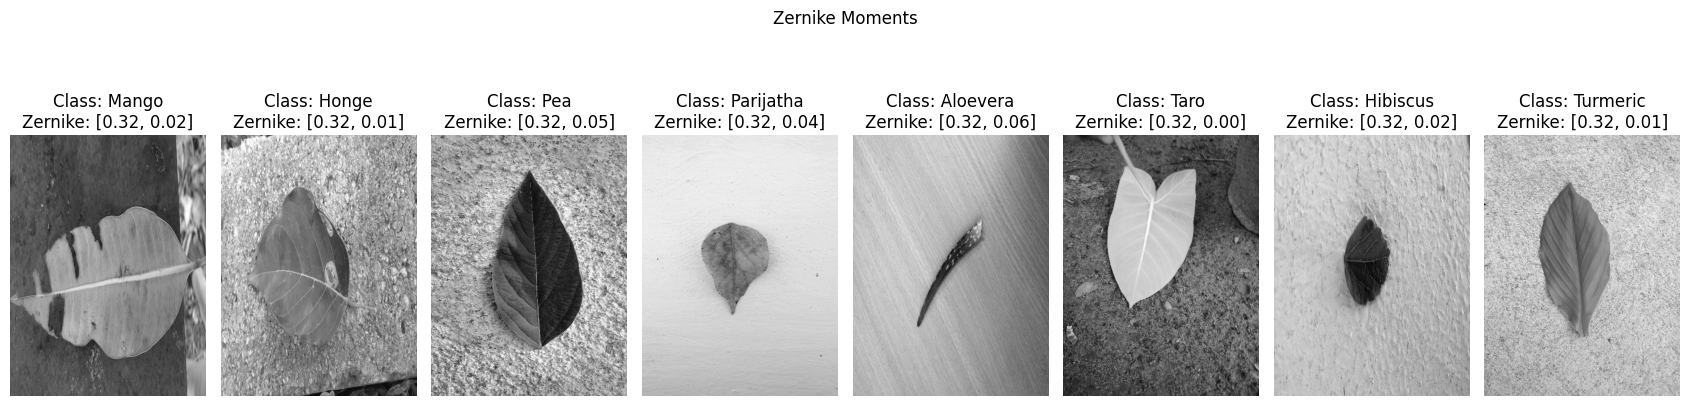

In [ ]:
from mahotas.features import zernike_moments

plt.figure(figsize=(17, 5))
for idx, category in enumerate(categories):
    img_index = np.where(labels == idx)[0][0]
    gray_img = cv2.cvtColor(data[img_index], cv2.COLOR_BGR2GRAY)

    # Compute Zernike moments with a radius of 21
    zernike_features = zernike_moments(gray_img, radius=21)

    # Truncate the Zernike features to display only the first two for clarity
    truncated_features = ", ".join([f"{f:.2f}" for f in zernike_features[:2]])

    plt.subplot(1, len(categories), idx + 1)
    plt.imshow(gray_img, cmap='gray')
    plt.title(f"Class: {category}\nZernike: [{truncated_features}]")
    plt.axis('off')

plt.suptitle("Zernike Moments")
plt.tight_layout()
plt.show()


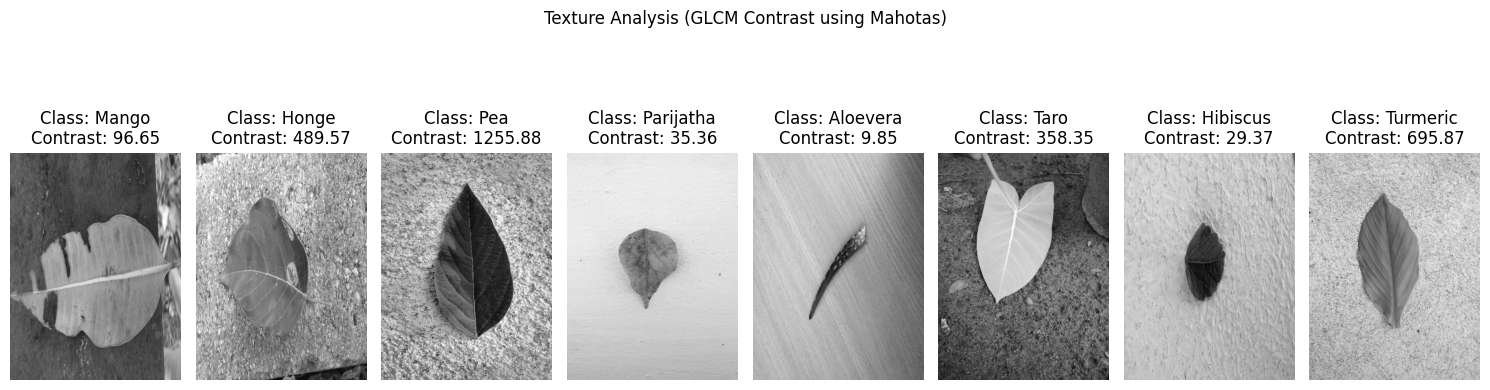

In [ ]:
import mahotas as mt
import matplotlib.pyplot as plt

# GLCM Contrast Calculation
plt.figure(figsize=(15, 5))
for idx, category in enumerate(categories):
    img_index = np.where(labels == idx)[0][0]
    gray_img = cv2.cvtColor(data[img_index], cv2.COLOR_BGR2GRAY)

    # Compute Haralick features
    haralick_features = mt.features.haralick(gray_img)
    contrast = haralick_features.mean(axis=0)[1]  # Contrast is the second Haralick feature

    # Plot the image with the contrast value
    plt.subplot(1, len(categories), idx + 1)
    plt.imshow(gray_img, cmap='gray')
    plt.title(f"Class: {category}\nContrast: {contrast:.2f}")
    plt.axis('off')

plt.suptitle("Texture Analysis (GLCM Contrast using Mahotas)")
plt.tight_layout()
plt.show()


In [ ]:
!pip install PyWavelets

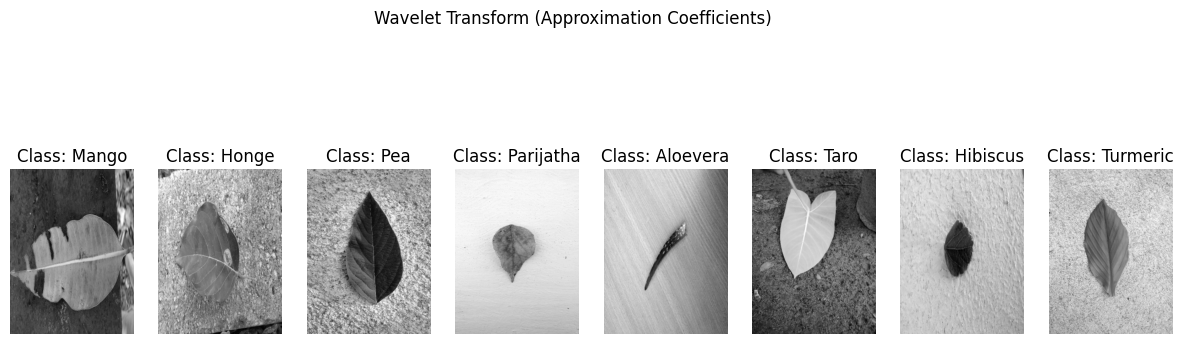

In [ ]:
import pywt

plt.figure(figsize=(15, 5))
for idx, category in enumerate(categories):
    img_index = np.where(labels == idx)[0][0]
    gray_img = cv2.cvtColor(data[img_index], cv2.COLOR_BGR2GRAY)

    # Apply Discrete Wavelet Transform (DWT) using the 'haar' wavelet
    coeffs2 = pywt.dwt2(gray_img, 'haar')
    cA, (cH, cV, cD) = coeffs2  # Approximation and detail coefficients

    plt.subplot(1, len(categories), idx + 1)
    plt.imshow(cA, cmap='gray')  # Display approximation coefficients
    plt.title(f"Class: {category}")
    plt.axis('off')

plt.suptitle("Wavelet Transform (Approximation Coefficients)")
plt.show()


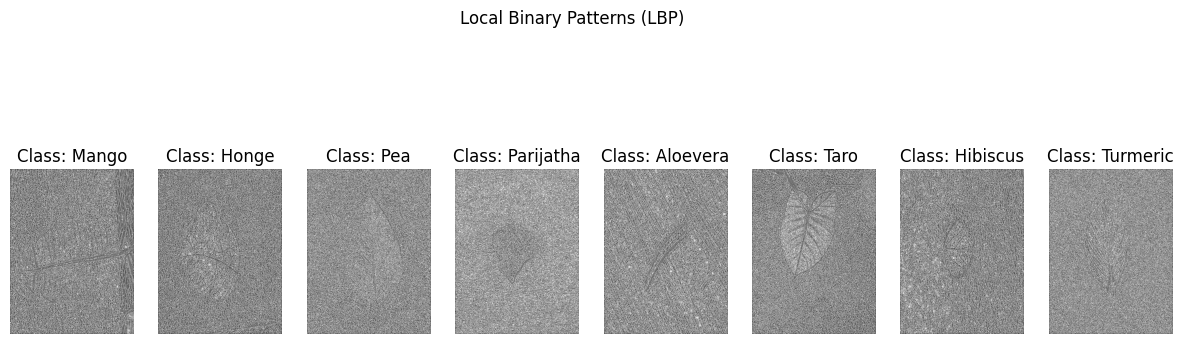

In [ ]:
from skimage.feature import local_binary_pattern

plt.figure(figsize=(15, 5))
for idx, category in enumerate(categories):
    img_index = np.where(labels == idx)[0][0]
    gray_img = cv2.cvtColor(data[img_index], cv2.COLOR_BGR2GRAY)

    # Apply Local Binary Pattern
    lbp = local_binary_pattern(gray_img, P=8, R=1, method='uniform')

    plt.subplot(1, len(categories), idx + 1)
    plt.imshow(lbp, cmap='gray')
    plt.title(f"Class: {category}")
    plt.axis('off')

plt.suptitle("Local Binary Patterns (LBP)")
plt.show()


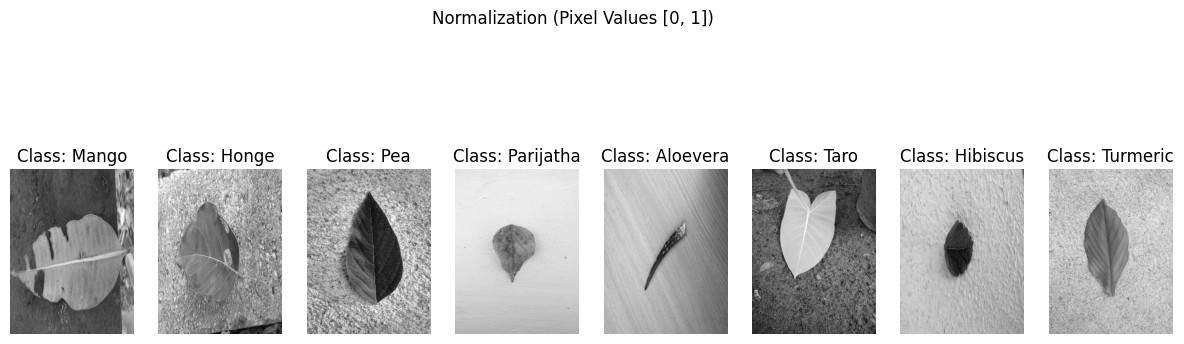

In [ ]:
plt.figure(figsize=(15, 5))
for idx, category in enumerate(categories):
    img_index = np.where(labels == idx)[0][0]
    gray_img = cv2.cvtColor(data[img_index], cv2.COLOR_BGR2GRAY)
    normalized_img = gray_img / 255.0

    plt.subplot(1, len(categories), idx + 1)
    plt.imshow(normalized_img, cmap='gray')
    plt.title(f"Class: {category}")
    plt.axis('off')

plt.suptitle("Normalization (Pixel Values [0, 1])")
plt.show()


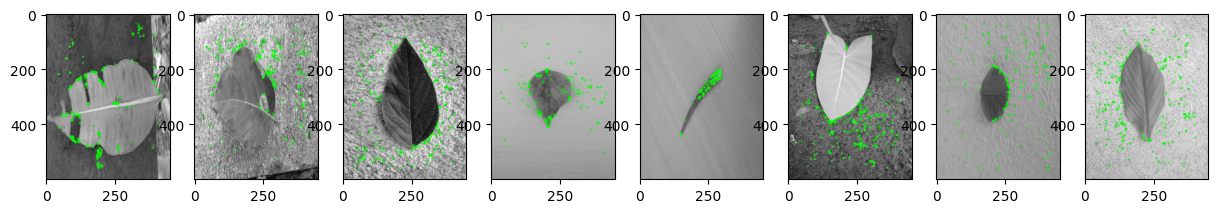

In [ ]:
orb = cv2.ORB_create()

plt.figure(figsize=(15, 5))
for idx, category in enumerate(categories):
    img_index = np.where(labels == idx)[0][0]
    gray_img = cv2.cvtColor(data[img_index], cv2.COLOR_BGR2GRAY)
    keypoints, descriptors = orb.detectAndCompute(gray_img, None)
    img_with_keypoints = cv2.drawKeypoints(gray_img, keypoints, None, color=(0, 255, 0))

    plt.subplot(1, len(categories), idx + 1)
    plt.imshow(img_with_keypoints, cmap='gray')
    plt.title


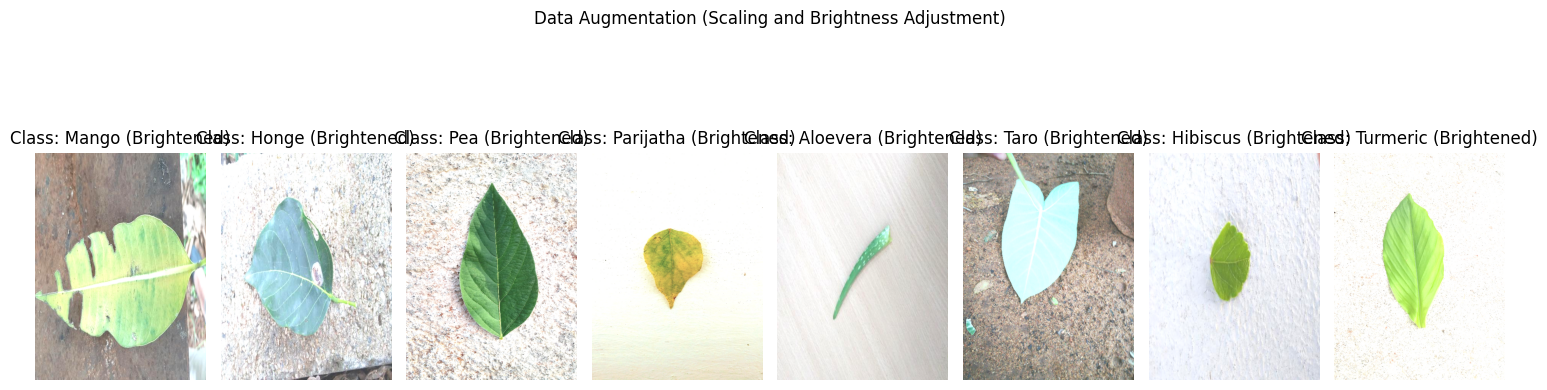

In [ ]:
plt.figure(figsize=(15, 5))
for idx, category in enumerate(categories):
    img_index = np.where(labels == idx)[0][0]
    img = data[img_index]

    # Apply scaling
    scaled_img = cv2.resize(img, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_LINEAR)

    # Apply brightness adjustment
    brightness_img = cv2.convertScaleAbs(img, alpha=1.2, beta=50)

    plt.subplot(1, len(categories), idx + 1)
    plt.imshow(cv2.cvtColor(brightness_img, cv2.COLOR_BGR2RGB))
    plt.title(f"Class: {category} (Brightened)")
    plt.axis('off')

plt.suptitle("Data Augmentation (Scaling and Brightness Adjustment)")
plt.tight_layout()
plt.show()


### We have implemented over 10 to 13 features on the Indian Leaf Dataset and evaluated their accuracy using a CNN model to identify which features yield the best results.

In [ ]:
import tensorflow as tf
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Helper function for evaluation
def evaluate_model(model, X_test, y_test, class_names):
    y_pred = np.argmax(model.predict(X_test), axis=1)

    # Ensure target names match the unique classes in the training set
    labels = np.arange(len(class_names))  # Assume class labels are 0 to 8
    target_names = class_names

    print("Classification Report:\n", classification_report(y_test, y_pred, labels=labels, target_names=target_names, zero_division=0))
    print("Accuracy:", accuracy_score(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=target_names, yticklabels=target_names, cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Build CNN model
def build_cnn(input_shape, num_classes):
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=input_shape),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 16s 885ms/step - accuracy: 0.1508 - loss: 1602.7760 - val_accuracy: 0.1111 - val_loss: 1170.1013
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 753ms/step - accuracy: 0.4990 - loss: 578.4434 - val_accuracy: 0.3981 - val_loss: 534.6406
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 631ms/step - accuracy: 0.8995 - loss: 39.2419 - val_accuracy: 0.3889 - val_loss: 629.8114
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 12s 780ms/step - accuracy: 0.9354 - loss: 51.0054 - val_accuracy: 0.4630 - val_loss: 670.0054
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 18s 615ms/step - accuracy: 0.9473 - loss: 22.5120 - val_accuracy: 0.3148 - val_loss: 1304.4325
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 678ms/step - accuracy: 0.9663 - loss: 23.6042 - val_accuracy: 0.4167 - val_loss: 511.2122
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 786ms/step - accuracy: 0.9921 - loss: 0.9896 - val_accuracy: 0.4259 - val_loss: 552.9368
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 20s 713ms/step - accuracy: 0.9867 -

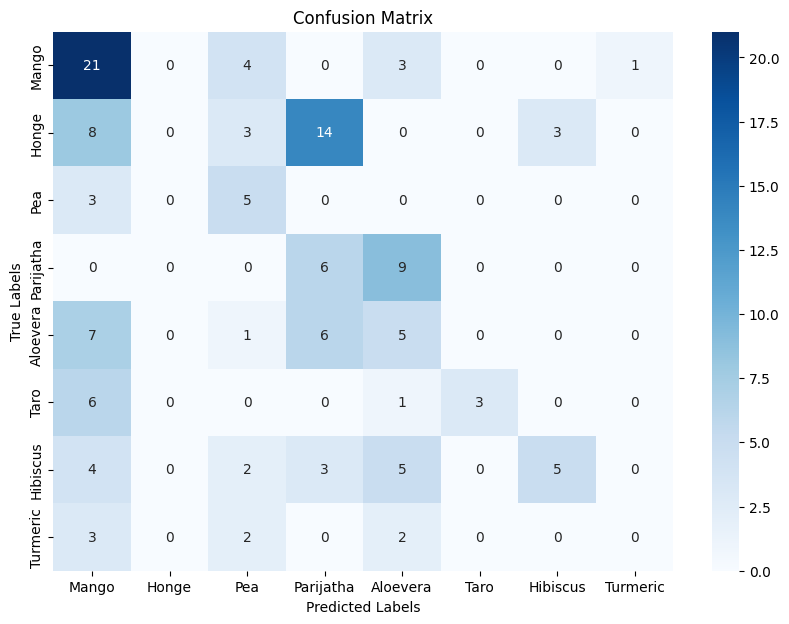

In [ ]:


# Feature extraction: Canny Edge Detection
features = []
for img in X_train:
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray_img, 100, 200)
    features.append(edges.flatten())
features = np.array(features)

# Test set
test_features = []
for img in X_test:
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray_img, 100, 200)
    test_features.append(edges.flatten())e
test_features = np.array(test_features)

# Train CNN
input_shape = (features.shape[1],)
model = build_cnn(input_shape, num_classes=len(class_names))
model.fit(features, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate model
evaluate_model(model, test_features, y_test, class_names)


In [ ]:
unique_classes = np.unique(y_train)
print(f"Unique classes in training set: {unique_classes}")
print(f"Number of unique classes: {len(unique_classes)}")
print(f"Class names provided: {class_names}")
print(f"Number of class names: {len(class_names)}")


Unique classes in training set: [0 1 2 3 4 5 6 7]
Number of unique classes: 8
Class names provided: ['Mango', 'Honge', 'Pea', 'Parijatha', 'Aloevera', 'Taro', 'Hibiscus', 'Turmeric']
Number of class names: 8


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 687ms/step - accuracy: 0.2249 - loss: 2904057.7500 - val_accuracy: 0.4537 - val_loss: 1859253.8750
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 735ms/step - accuracy: 0.8021 - loss: 1483397.0000 - val_accuracy: 0.5093 - val_loss: 1908511.8750
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 19s 676ms/step - accuracy: 0.9055 - loss: 325610.3750 - val_accuracy: 0.5000 - val_loss: 1997968.6250
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 741ms/step - accuracy: 0.9154 - loss: 183204.1875 - val_accuracy: 0.4444 - val_loss: 2172521.2500
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 20s 741ms/step - accuracy: 0.9724 - loss: 70072.7969 - val_accuracy: 0.4444 - val_loss: 1918824.5000
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 21s 779ms/step - accuracy: 0.9849 - loss: 21641.4512 - val_accuracy: 0.4444 - val_loss: 1793898.1250
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 18s 614ms/step - accuracy: 0.9910 - loss: 28781.1035 - val_accuracy: 0.4444 - val_loss: 2747687.0000
Epoch 8/10
14/14 ━━━━

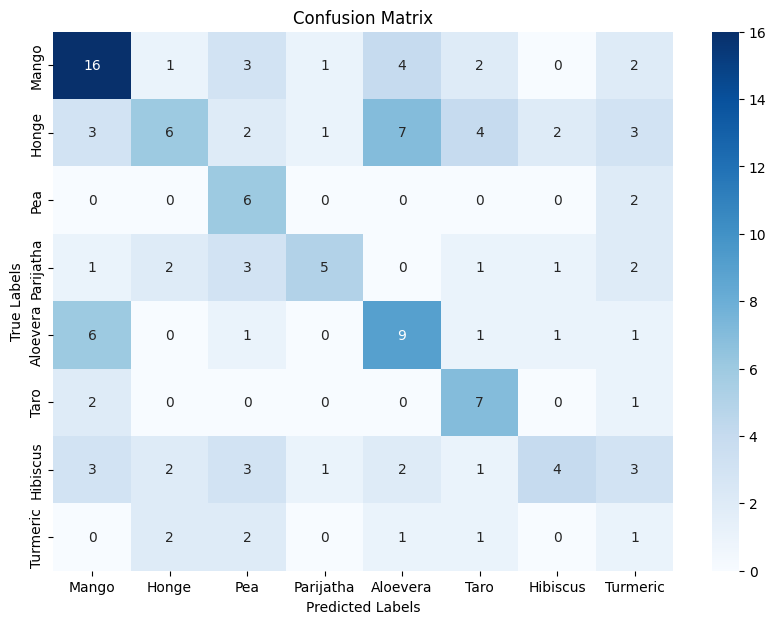

In [ ]:
# Feature extraction: Harris Corner Detection
features = []
for img in X_train:
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    harris = cv2.cornerHarris(np.float32(gray_img), 2, 3, 0.04)
    features.append(harris.flatten())
features = np.array(features)

# Test set
test_features = []
for img in X_test:
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    harris = cv2.cornerHarris(np.float32(gray_img), 2, 3, 0.04)
    test_features.append(harris.flatten())
test_features = np.array(test_features)

# Train CNN
input_shape = (features.shape[1],)
model = build_cnn(input_shape, num_classes=len(class_names))
model.fit(features, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate model
evaluate_model(model, test_features, y_test, class_names)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.2984 - loss: 1224.7697 - val_accuracy: 0.4722 - val_loss: 321.2771
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5571 - loss: 259.0448 - val_accuracy: 0.5278 - val_loss: 313.1799
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6421 - loss: 173.5261 - val_accuracy: 0.7037 - val_loss: 142.2799
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7750 - loss: 85.8786 - val_accuracy: 0.6944 - val_loss: 190.1734
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7716 - loss: 83.4258 - val_accuracy: 0.6574 - val_loss: 130.2899
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8062 - loss: 80.1786 - val_accuracy: 0.6204 - val_loss: 140.3011
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8350 - loss: 31.2849 - val_accuracy: 0.6389 - val_loss: 154.5260
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8039 - loss: 69.3637 - val_accur

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Classification Report:
               precision    recall  f1-score   support

       Mango       0.79      0.52      0.62        29
       Honge       0.62      0.75      0.68        28
         Pea       0.70      0.88      0.78         8
   Parijatha       0.71      0.80      0.75        15
    Aloevera       0.58      0.74      0.65        19
        Taro       0.69      0.90      0.78        10
    Hibiscus       0.75      0.47      0.58        19
    Turmeric       0.83      0.71      0.77         7

    accuracy                           0.68       135
   macro avg       0.71      0.72      0.70       135
weighted avg       0.70      0.68      0.68       135

Accuracy: 0.6814814814814815


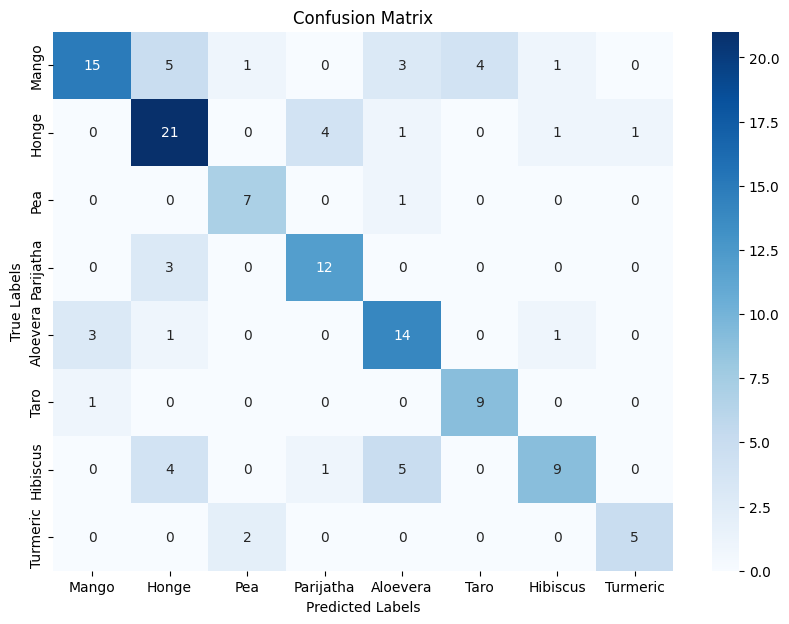

In [ ]:
# Feature extraction: Color Histogram
features = []
for img in X_train:
    hist_r = cv2.calcHist([img], [0], None, [256], [0, 256]).flatten()
    hist_g = cv2.calcHist([img], [1], None, [256], [0, 256]).flatten()
    hist_b = cv2.calcHist([img], [2], None, [256], [0, 256]).flatten()
    features.append(np.concatenate([hist_r, hist_g, hist_b]))
features = np.array(features)

# Test set
test_features = []
for img in X_test:
    hist_r = cv2.calcHist([img], [0], None, [256], [0, 256]).flatten()
    hist_g = cv2.calcHist([img], [1], None, [256], [0, 256]).flatten()
    hist_b = cv2.calcHist([img], [2], None, [256], [0, 256]).flatten()
    test_features.append(np.concatenate([hist_r, hist_g, hist_b]))
test_features = np.array(test_features)

# Train CNN
input_shape = (features.shape[1],)
model = build_cnn(input_shape, num_classes=len(class_names))
model.fit(features, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate model
evaluate_model(model, test_features, y_test, class_names)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 523ms/step - accuracy: 0.1236 - loss: 13.9343 - val_accuracy: 0.3148 - val_loss: 4.3448
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 336ms/step - accuracy: 0.2133 - loss: 4.0241 - val_accuracy: 0.1574 - val_loss: 4.1148
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 351ms/step - accuracy: 0.2690 - loss: 2.6120 - val_accuracy: 0.2315 - val_loss: 2.2354
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 478ms/step - accuracy: 0.4283 - loss: 1.7423 - val_accuracy: 0.4815 - val_loss: 1.7678
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 15s 824ms/step - accuracy: 0.6592 - loss: 1.1478 - val_accuracy: 0.3611 - val_loss: 1.5137
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 16s 504ms/step - accuracy: 0.7361 - loss: 0.8295 - val_accuracy: 0.5926 - val_loss: 1.3132
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 358ms/step - accuracy: 0.8436 - loss: 0.7050 - val_accuracy: 0.4815 - val_loss: 1.4876
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 384ms/step - accuracy: 0.8601 - loss: 0.5482 - val_accuracy:

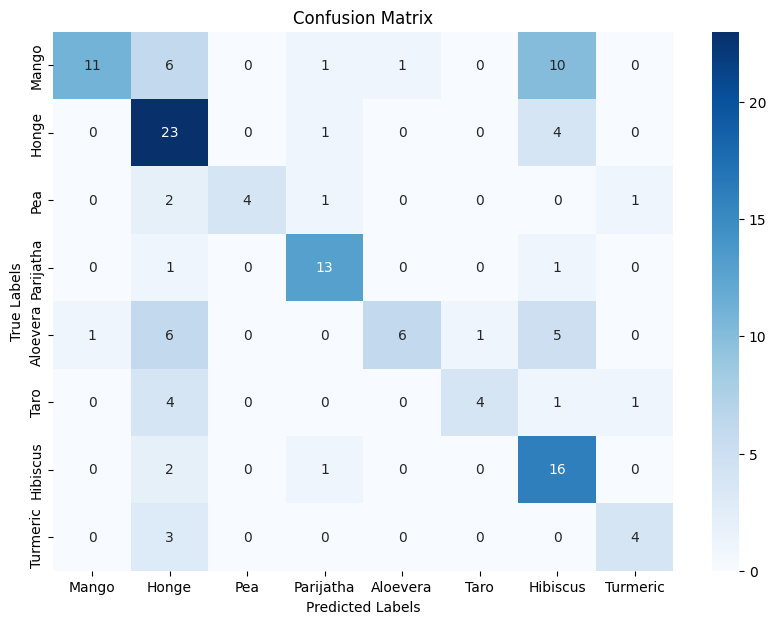

In [ ]:
from skimage.feature import hog
# Feature extraction: HOG
features = []
for img in X_train:
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    hog_features = hog(gray_img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)
    features.append(hog_features)
features = np.array(features)

# Test set
test_features = []
for img in X_test:
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    hog_features = hog(gray_img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)
    test_features.append(hog_features)
test_features = np.array(test_features)

# Train CNN
input_shape = (features.shape[1],)
model = build_cnn(input_shape, num_classes=len(class_names))
model.fit(features, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate model
evaluate_model(model, test_features, y_test, class_names)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 642ms/step - accuracy: 0.1211 - loss: 22750.8125 - val_accuracy: 0.1667 - val_loss: 28196.8867
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 777ms/step - accuracy: 0.1240 - loss: 19761.7617 - val_accuracy: 0.1759 - val_loss: 12684.4736
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 737ms/step - accuracy: 0.1799 - loss: 11968.3545 - val_accuracy: 0.1759 - val_loss: 8824.1768
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 21s 755ms/step - accuracy: 0.1598 - loss: 9899.8555 - val_accuracy: 0.1759 - val_loss: 6964.1738
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 18s 633ms/step - accuracy: 0.1197 - loss: 6296.5376 - val_accuracy: 0.1759 - val_loss: 8227.2568
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 680ms/step - accuracy: 0.2044 - loss: 4345.2422 - val_accuracy: 0.2130 - val_loss: 4269.7275
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 778ms/step - accuracy: 0.2314 - loss: 3501.5852 - val_accuracy: 0.1944 - val_loss: 2801.3730
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 19s 674ms/st

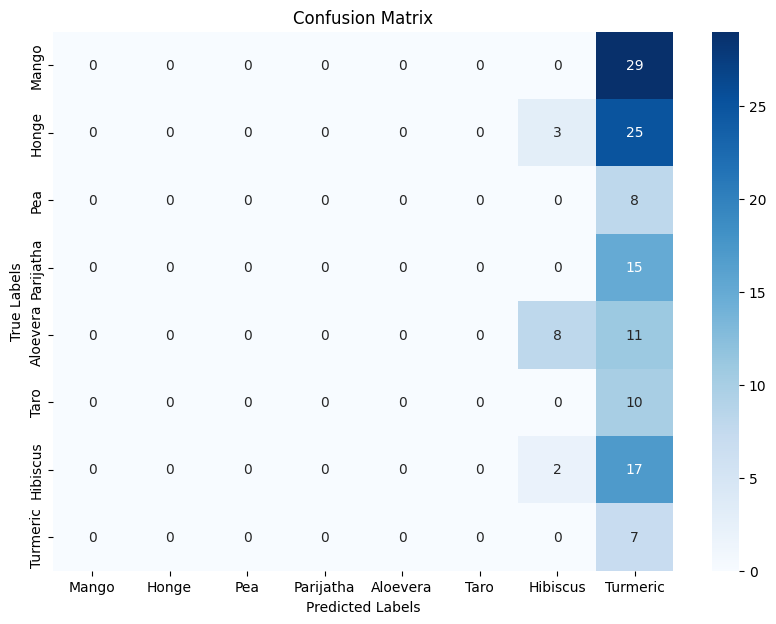

In [ ]:
# Feature extraction: Fourier Transform
features = []
for img in X_train:
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    f_transform = np.fft.fft2(gray_img)
    f_shift = np.fft.fftshift(f_transform)
    magnitude_spectrum = 20 * np.log(np.abs(f_shift))
    features.append(magnitude_spectrum.flatten())
features = np.array(features)

# Test set
test_features = []
for img in X_test:
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    f_transform = np.fft.fft2(gray_img)
    f_shift = np.fft.fftshift(f_transform)
    magnitude_spectrum = 20 * np.log(np.abs(f_shift))
    test_features.append(magnitude_spectrum.flatten())
test_features = np.array(test_features)

# Train CNN
input_shape = (features.shape[1],)
model = build_cnn(input_shape, num_classes=len(class_names))
model.fit(features, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate model
evaluate_model(model, test_features, y_test, class_names)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 12s 704ms/step - accuracy: 0.1040 - loss: 2875.3833 - val_accuracy: 0.0926 - val_loss: 1518.5537
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 793ms/step - accuracy: 0.2378 - loss: 1169.1401 - val_accuracy: 0.2963 - val_loss: 424.0610
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 20s 690ms/step - accuracy: 0.4723 - loss: 258.6107 - val_accuracy: 0.3333 - val_loss: 193.4602
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 784ms/step - accuracy: 0.6410 - loss: 63.9828 - val_accuracy: 0.4537 - val_loss: 160.0883
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 19s 682ms/step - accuracy: 0.7809 - loss: 24.0055 - val_accuracy: 0.3889 - val_loss: 199.2758
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 778ms/step - accuracy: 0.8532 - loss: 20.0621 - val_accuracy: 0.4259 - val_loss: 107.1991
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 19s 669ms/step - accuracy: 0.8533 - loss: 10.6725 - val_accuracy: 0.4630 - val_loss: 167.5647
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 789ms/step - accuracy: 0.924

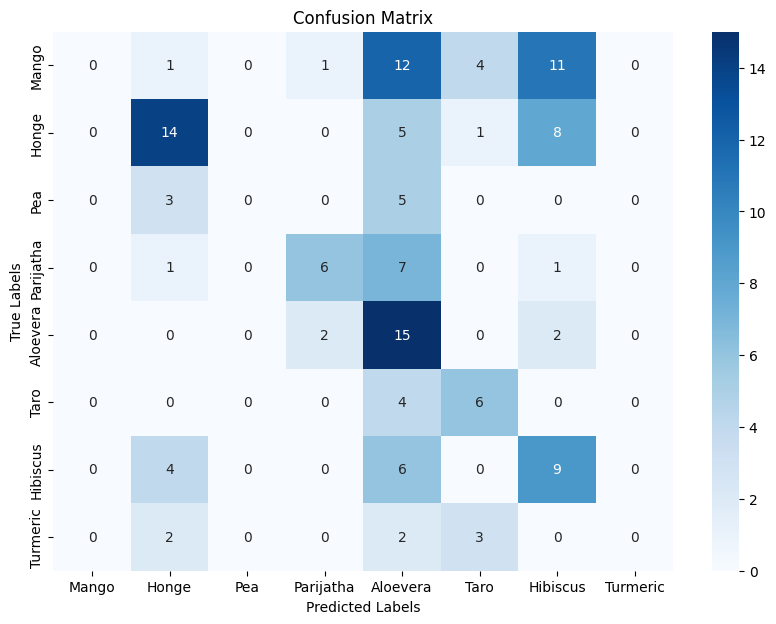

In [ ]:
from skimage.filters import gabor
# Feature extraction: Gabor Filters
features = []
for img in X_train:
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gabor_features, _ = gabor(gray_img, frequency=0.6)
    features.append(gabor_features.flatten())
features = np.array(features)

# Test set
test_features = []
for img in X_test:
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gabor_features, _ = gabor(gray_img, frequency=0.6)
    test_features.append(gabor_features.flatten())
test_features = np.array(test_features)

# Train CNN
input_shape = (features.shape[1],)
model = build_cnn(input_shape, num_classes=len(class_names))
model.fit(features, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate model
evaluate_model(model, test_features, y_test, class_names)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.1972 - loss: 2.0611 - val_accuracy: 0.1111 - val_loss: 2.0556
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2114 - loss: 2.0294 - val_accuracy: 0.1111 - val_loss: 2.0471
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2318 - loss: 2.0011 - val_accuracy: 0.1111 - val_loss: 2.0494
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2233 - loss: 1.9871 - val_accuracy: 0.1111 - val_loss: 2.0525
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1875 - loss: 2.0013 - val_accuracy: 0.1111 - val_loss: 2.0441
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2204 - loss: 1.9974 - val_accuracy: 0.1204 - val_loss: 2.0435
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2223 - loss: 1.9966 - val_accuracy: 0.1204 - val_loss: 2.0410
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2381 - loss: 1.9711 - val_accuracy: 0.1204 - val_loss: 2.0402


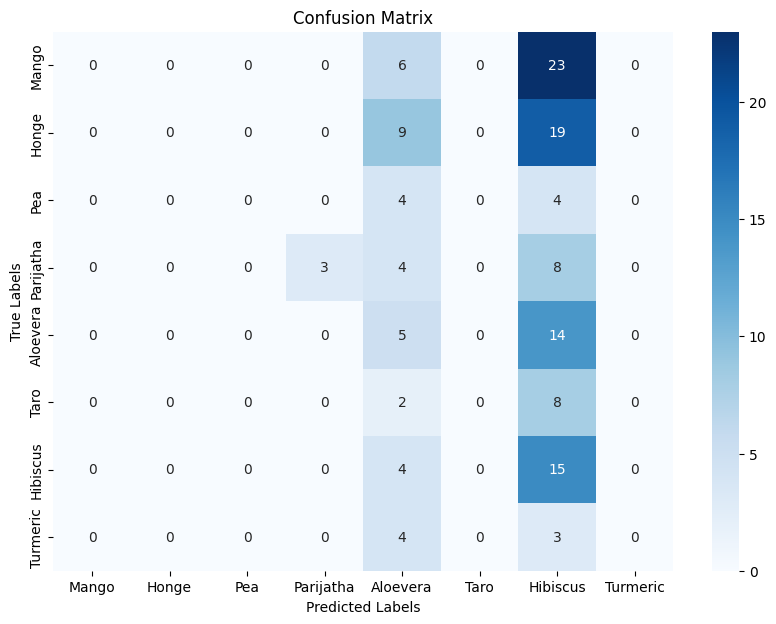

In [ ]:
from mahotas.features import zernike_moments

# Feature extraction: Zernike Moments
features = []
for img in X_train:
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    zernike_features = zernike_moments(gray_img, radius=21)
    features.append(zernike_features)
features = np.array(features)

# Test set
test_features = []
for img in X_test:
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    zernike_features = zernike_moments(gray_img, radius=21)
    test_features.append(zernike_features)
test_features = np.array(test_features)

# Train CNN
input_shape = (features.shape[1],)
model = build_cnn(input_shape, num_classes=len(class_names))
model.fit(features, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate model
evaluate_model(model, test_features, y_test, class_names)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.1751 - loss: 16.6691 - val_accuracy: 0.2500 - val_loss: 3.2716
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0947 - loss: 4.3038 - val_accuracy: 0.0370 - val_loss: 2.7271
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1168 - loss: 2.7523 - val_accuracy: 0.1667 - val_loss: 2.4690
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1197 - loss: 2.5189 - val_accuracy: 0.1481 - val_loss: 2.1224
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2500 - loss: 2.1997 - val_accuracy: 0.2130 - val_loss: 2.0841
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1777 - loss: 2.2090 - val_accuracy: 0.1296 - val_loss: 2.6369
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2128 - loss: 2.4234 - val_accuracy: 0.1204 - val_loss: 2.4545
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2379 - loss: 2.1983 - val_accuracy: 0.2407 - val_loss: 2.1294
E

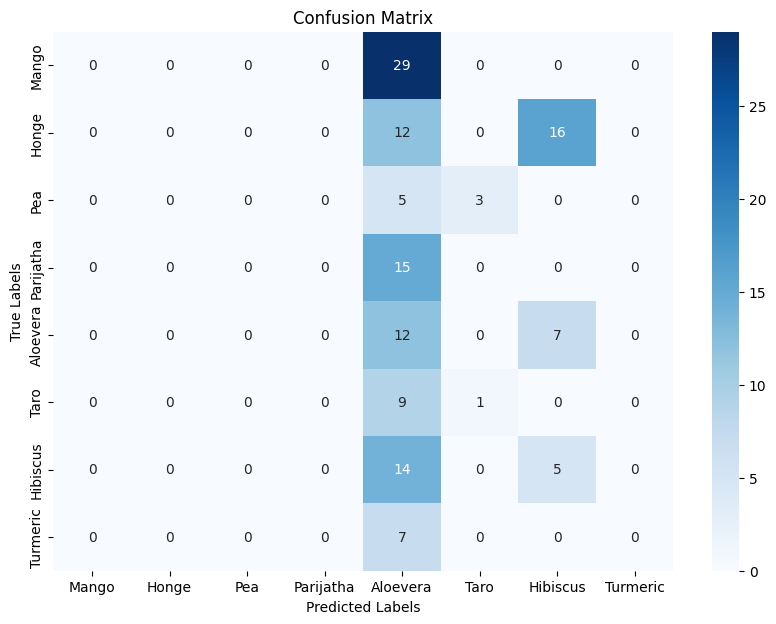

In [ ]:
import mahotas as mt

# Feature extraction: GLCM Contrast
features = []
for img in X_train:
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    haralick_features = mt.features.haralick(gray_img)
    contrast = haralick_features.mean(axis=0)[1]  # Contrast feature
    features.append([contrast])
features = np.array(features)

# Test set
test_features = []
for img in X_test:
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    haralick_features = mt.features.haralick(gray_img)
    contrast = haralick_features.mean(axis=0)[1]
    test_features.append([contrast])
test_features = np.array(test_features)

# Train CNN
input_shape = (features.shape[1],)
model = build_cnn(input_shape, num_classes=len(class_names))
model.fit(features, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate model
evaluate_model(model, test_features, y_test, class_names)


In [ ]:
!pip install PyWavelets

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 209ms/step - accuracy: 0.1106 - loss: 13379.9463 - val_accuracy: 0.1759 - val_loss: 7985.3286
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 150ms/step - accuracy: 0.2235 - loss: 7263.7583 - val_accuracy: 0.1204 - val_loss: 5604.0269
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 157ms/step - accuracy: 0.2377 - loss: 4389.1533 - val_accuracy: 0.1759 - val_loss: 2843.4751
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 187ms/step - accuracy: 0.2409 - loss: 2480.0007 - val_accuracy: 0.3056 - val_loss: 1521.4854
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 165ms/step - accuracy: 0.3788 - loss: 1474.1918 - val_accuracy: 0.3241 - val_loss: 1288.6664
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 164ms/step - accuracy: 0.3454 - loss: 1050.3376 - val_accuracy: 0.3426 - val_loss: 640.1136
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 167ms/step - accuracy: 0.3308 - loss: 843.1165 - val_accuracy: 0.3148 - val_loss: 1146.5760
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 176ms/step - accuracy:

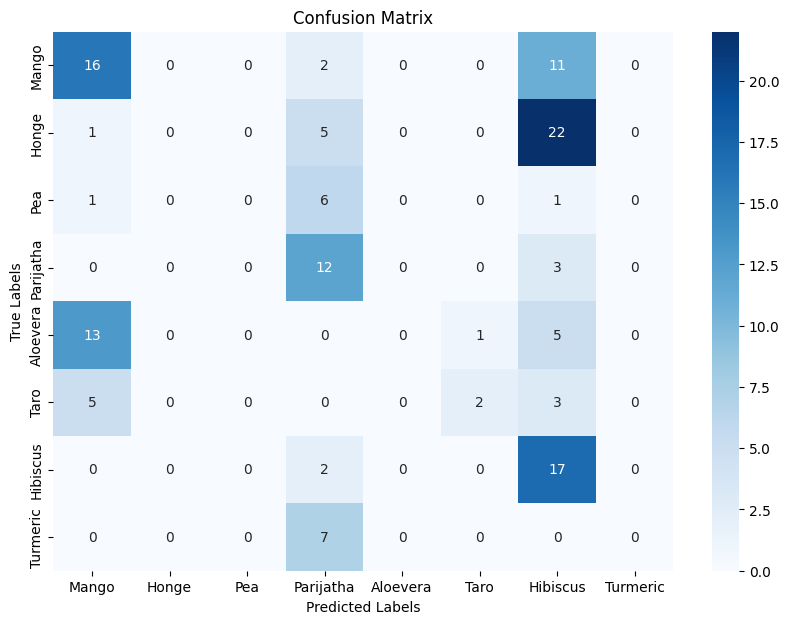

In [ ]:
import pywt

# Feature extraction: Wavelet Transform
features = []
for img in X_train:
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    coeffs2 = pywt.dwt2(gray_img, 'haar')
    cA, _ = coeffs2  # Approximation coefficients
    features.append(cA.flatten())
features = np.array(features)

# Test set
test_features = []
for img in X_test:
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    coeffs2 = pywt.dwt2(gray_img, 'haar')
    cA, _ = coeffs2
    test_features.append(cA.flatten())
test_features = np.array(test_features)

# Train CNN
input_shape = (features.shape[1],)
model = build_cnn(input_shape, num_classes=len(class_names))
model.fit(features, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate model
evaluate_model(model, test_features, y_test, class_names)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 637ms/step - accuracy: 0.1532 - loss: 957.3504 - val_accuracy: 0.1667 - val_loss: 333.0448
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 764ms/step - accuracy: 0.1828 - loss: 446.8289 - val_accuracy: 0.1667 - val_loss: 240.8169
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 18s 629ms/step - accuracy: 0.1866 - loss: 241.9804 - val_accuracy: 0.1111 - val_loss: 174.1345
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 744ms/step - accuracy: 0.1588 - loss: 145.5450 - val_accuracy: 0.0556 - val_loss: 75.5801
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 20s 694ms/step - accuracy: 0.2024 - loss: 69.7989 - val_accuracy: 0.1759 - val_loss: 51.7030
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 689ms/step - accuracy: 0.2658 - loss: 36.0077 - val_accuracy: 0.1944 - val_loss: 46.3692
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.4565 - loss: 19.5700 - val_accuracy: 0.1852 - val_loss: 32.7584
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 19s 926ms/step - accuracy: 0.5259 - loss:

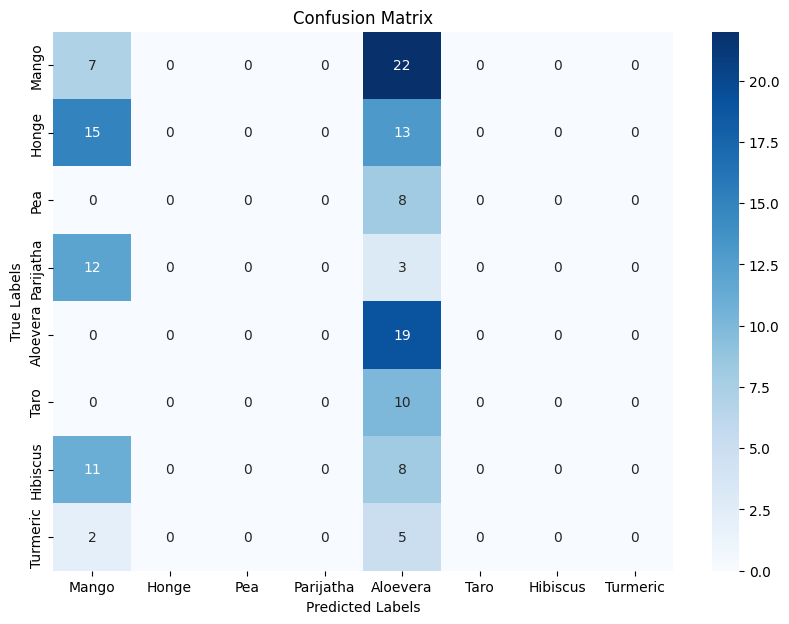

In [ ]:
from skimage.feature import local_binary_pattern

# Feature extraction: Local Binary Patterns (LBP)
features = []
for img in X_train:
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    lbp = local_binary_pattern(gray_img, P=8, R=1, method='uniform').flatten()
    features.append(lbp)
features = np.array(features)

# Test set
test_features = []
for img in X_test:
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    lbp = local_binary_pattern(gray_img, P=8, R=1, method='uniform').flatten()
    test_features.append(lbp)
test_features = np.array(test_features)

# Train CNN
input_shape = (features.shape[1],)
model = build_cnn(input_shape, num_classes=len(class_names))
model.fit(features, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate model
evaluate_model(model, test_features, y_test, class_names)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 13s 871ms/step - accuracy: 0.1293 - loss: 117.2690 - val_accuracy: 0.2222 - val_loss: 39.7031
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 17s 628ms/step - accuracy: 0.1861 - loss: 40.5821 - val_accuracy: 0.2130 - val_loss: 34.0532
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 12s 719ms/step - accuracy: 0.1895 - loss: 27.0179 - val_accuracy: 0.3611 - val_loss: 13.8886
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 20s 722ms/step - accuracy: 0.3991 - loss: 12.0984 - val_accuracy: 0.2500 - val_loss: 10.6935
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 21s 757ms/step - accuracy: 0.2420 - loss: 10.8901 - val_accuracy: 0.3056 - val_loss: 9.7950
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 19s 646ms/step - accuracy: 0.3138 - loss: 10.7904 - val_accuracy: 0.2870 - val_loss: 5.3643
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 684ms/step - accuracy: 0.3339 - loss: 7.0312 - val_accuracy: 0.2963 - val_loss: 9.4400
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 798ms/step - accuracy: 0.3326 - loss: 7.5055

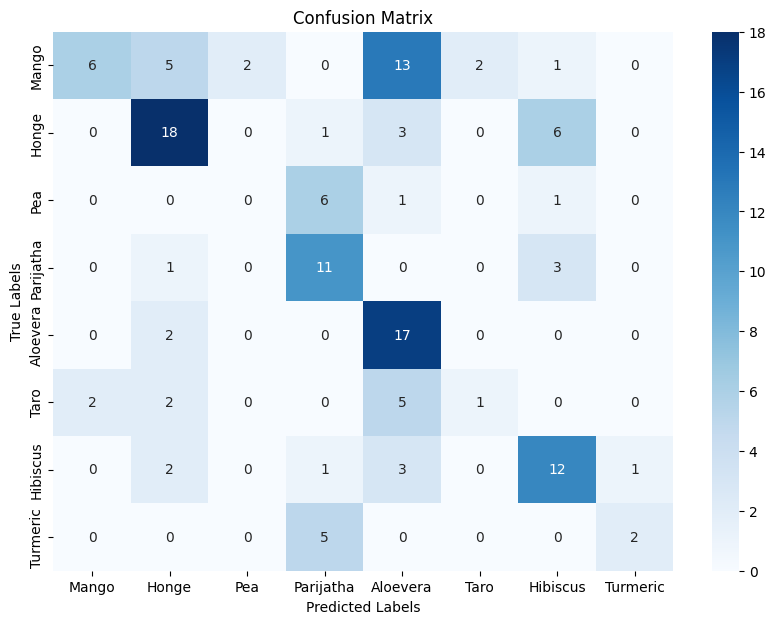

In [ ]:
# Feature extraction: Normalization
features = []
for img in X_train:
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    normalized_img = gray_img / 255.0
    features.append(normalized_img.flatten())
features = np.array(features)

# Test set
test_features = []
for img in X_test:
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    normalized_img = gray_img / 255.0
    test_features.append(normalized_img.flatten())
test_features = np.array(test_features)

# Train CNN
input_shape = (features.shape[1],)
model = build_cnn(input_shape, num_classes=len(class_names))
model.fit(features, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate model
evaluate_model(model, test_features, y_test, class_names)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 49s 3s/step - accuracy: 0.1630 - loss: 191286.5312 - val_accuracy: 0.1759 - val_loss: 116873.4688
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accuracy: 0.1657 - loss: 115358.0156 - val_accuracy: 0.1852 - val_loss: 23442.9551
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.1935 - loss: 22649.4688 - val_accuracy: 0.3056 - val_loss: 14188.7686
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 45s 3s/step - accuracy: 0.3099 - loss: 18777.2695 - val_accuracy: 0.2778 - val_loss: 20134.7891
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.2493 - loss: 25454.7031 - val_accuracy: 0.2963 - val_loss: 20118.0488
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 44s 3s/step - accuracy: 0.3346 - loss: 18181.3789 - val_accuracy: 0.1019 - val_loss: 22640.3262
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - accuracy: 0.2188 - loss: 15136.5195 - val_accuracy: 0.3333 - val_loss: 10038.9453
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accurac

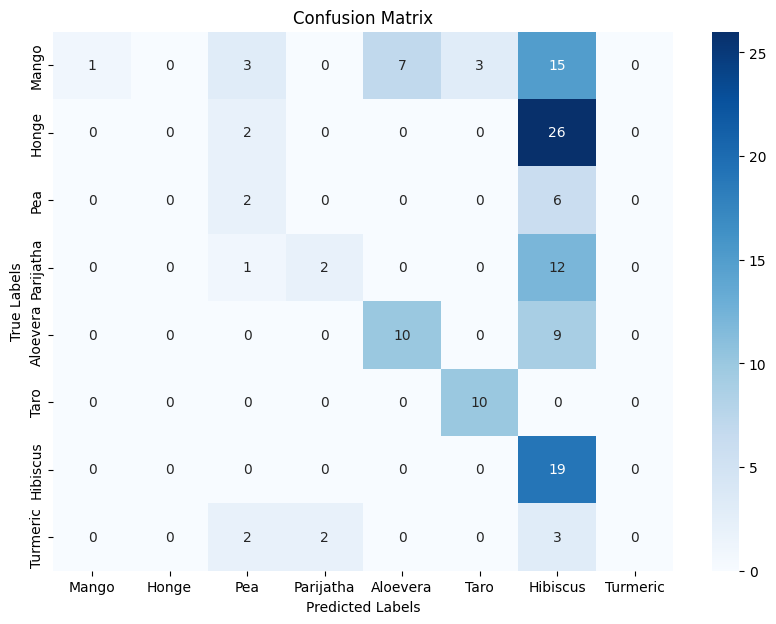

In [ ]:
# Feature extraction: Data Augmentation (Scaling and Brightness)
features = []
for img in X_train:
    # Scaling
    scaled_img = cv2.resize(img, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_LINEAR)

    # Brightness Adjustment
    brightened_img = cv2.convertScaleAbs(scaled_img, alpha=1.2, beta=50)
    features.append(brightened_img.flatten())
features = np.array(features)

# Test set
test_features = []
for img in X_test:
    scaled_img = cv2.resize(img, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_LINEAR)
    brightened_img = cv2.convertScaleAbs(scaled_img, alpha=1.2, beta=50)
    test_features.append(brightened_img.flatten())
test_features = np.array(test_features)

# Train CNN
input_shape = (features.shape[1],)
model = build_cnn(input_shape, num_classes=len(class_names))
model.fit(features, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate model
evaluate_model(model, test_features, y_test, class_names)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.2048 - loss: 2.0337 - val_accuracy: 0.2593 - val_loss: 1.9780
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.3073 - loss: 1.8829 - val_accuracy: 0.2407 - val_loss: 1.8666
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.2918 - loss: 1.8105 - val_accuracy: 0.2407 - val_loss: 1.8482
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.3619 - loss: 1.7191 - val_accuracy: 0.2593 - val_loss: 1.8181
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.4057 - loss: 1.6241 - val_accuracy: 0.2593 - val_loss: 1.8151
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.4340 - loss: 1.5342 - val_accuracy: 0.2963 - val_loss: 1.7717
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4834 - loss: 1.5009 - val_accuracy: 0.2963 - val_loss: 1.8132
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5387 - loss: 1.3995 - val_accuracy: 0.2778 - val_loss: 1.

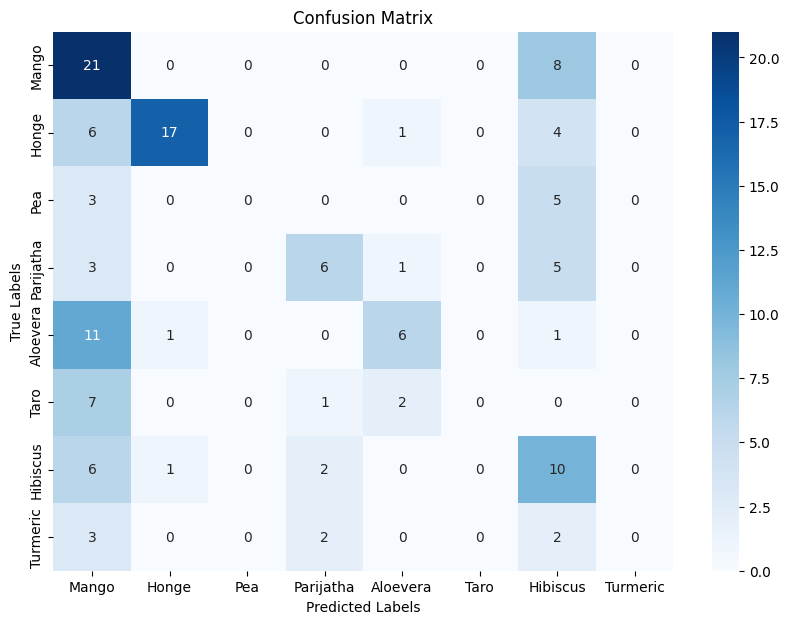

In [ ]:

# Initialize ORB detector
orb = cv2.ORB_create()

# Parameters
max_keypoints = 500  # Maximum number of keypoints to retain
descriptor_length = 32  # ORB descriptor length
target_vector_length = max_keypoints * descriptor_length  # Target length for feature vectors

def extract_orb_features(images, max_keypoints, descriptor_length):
    features = []
    for img in images:
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        keypoints, descriptors = orb.detectAndCompute(gray_img, None)

        if descriptors is None:
            # No descriptors found; create a zero vector
            feature_vector = np.zeros(target_vector_length, dtype=np.float32)
        else:
            # Pad or truncate descriptors to match max_keypoints
            if descriptors.shape[0] < max_keypoints:
                # Pad with zeros
                padding = np.zeros((max_keypoints - descriptors.shape[0], descriptor_length), dtype=np.float32)
                descriptors = np.vstack((descriptors, padding))
            elif descriptors.shape[0] > max_keypoints:
                # Truncate descriptors
                descriptors = descriptors[:max_keypoints, :]

            # Flatten to create feature vector
            feature_vector = descriptors.flatten()

        features.append(feature_vector)

    return np.array(features)


# Extract ORB features
X_train_features = extract_orb_features(X_train, max_keypoints, descriptor_length)
X_test_features = extract_orb_features(X_test, max_keypoints, descriptor_length)

# Normalize features
X_train_features = X_train_features / np.linalg.norm(X_train_features, axis=1, keepdims=True)
X_test_features = X_test_features / np.linalg.norm(X_test_features, axis=1, keepdims=True)

# Build and train your model
input_shape = (X_train_features.shape[1],)
num_classes = len(np.unique(y_train))

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=input_shape),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_features, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)


# Assuming 'categories' is a list of class names
evaluate_model(model, X_test_features, y_test, categories)





### Selected these three features with an accuracy of 50%. Although we could choose features with an accuracy of 30% or higher, the VRAM is crashing due to limited resources on Google Colab.

Color Histogram (64%)  <br/>
HOG (60%)<br/>
Normalization (49%)

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from skimage.feature import hog
from tqdm import tqdm

# Calculate feature lengths
def calculate_feature_lengths():
    example_img = cv2.imread(os.path.join(dataset_path, categories[0], os.listdir(os.path.join(dataset_path, categories[0]))[0]))
    gray_img = cv2.cvtColor(example_img, cv2.COLOR_BGR2GRAY)

    color_hist_len = 256 * 3  # Color Histogram: 256 bins for R, G, B
    hog_len = len(hog(gray_img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False))
    normalized_len = gray_img.size  # Normalized Pixel Features
    return color_hist_len, hog_len, normalized_len

color_hist_len, hog_len, normalized_len = calculate_feature_lengths()
fixed_feature_length = color_hist_len + hog_len + normalized_len

# Helper function to standardize feature lengths
def standardize_features(features, target_length):
    """Ensure all features are of the same length."""
    if len(features) < target_length:
        return np.pad(features, (0, target_length - len(features)), 'constant')
    else:
        return features[:target_length]

# Feature extraction functions
@tf.function
def extract_color_histogram_tf(img):
    img = tf.cast(img, tf.float32)  # Cast to float32 for TensorFlow operations
    hist_r = tf.histogram_fixed_width(img[:, :, 0], [0, 255], nbins=256)
    hist_g = tf.histogram_fixed_width(img[:, :, 1], [0, 255], nbins=256)
    hist_b = tf.histogram_fixed_width(img[:, :, 2], [0, 255], nbins=256)
    return tf.concat([hist_r, hist_g, hist_b], axis=0)

def extract_hog_features(img):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return hog(gray_img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)

@tf.function
def extract_normalized_pixel_features(img):
    gray_img = tf.image.rgb_to_grayscale(img)  # Convert to grayscale
    gray_img = tf.cast(gray_img, tf.float32)  # Cast to float32
    return tf.reshape(gray_img / 255.0, [-1])  # Normalize and flatten

# Process and save data in batches
batch_size = 50  # Adjust batch size to control memory usage
features_path = "/content/combined_features.npy"
labels_path = "/content/combined_labels.npy"

features = []
labels = []

for category_idx, category in enumerate(categories):
    folder_path = os.path.join(dataset_path, category)
    for img_idx, img_name in enumerate(tqdm(os.listdir(folder_path), desc=f"Processing category {category}")):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)

        if img is not None:
            try:
                # Convert image to TensorFlow tensor for GPU computation
                img_tf = tf.convert_to_tensor(img, dtype=tf.uint8)

                # Extract features
                color_hist_features = extract_color_histogram_tf(img_tf).numpy()
                hog_features = extract_hog_features(img)
                normalized_pixel_features = extract_normalized_pixel_features(img_tf).numpy()

                # Combine features and standardize
                combined_features = np.concatenate([color_hist_features, hog_features, normalized_pixel_features])
                combined_features = standardize_features(combined_features, fixed_feature_length)

                # Append to batch
                features.append(combined_features)
                labels.append(category_idx)
            except Exception as e:
                print(f"Error processing {img_name}: {e}")

        # Save in batches to prevent memory overflow
        if len(features) == batch_size:
            # Save to disk
            try:
                if os.path.exists(features_path):
                    np.save(features_path, np.vstack((np.load(features_path), features)))
                    np.save(labels_path, np.concatenate((np.load(labels_path), labels)))
                else:
                    np.save(features_path, np.array(features))
                    np.save(labels_path, np.array(labels))
            except Exception as e:
                print(f"Error saving batch: {e}")

            # Clear batch
            features = []
            labels = []

# Save remaining data
if len(features) > 0:
    if os.path.exists(features_path):
        np.save(features_path, np.vstack((np.load(features_path), features)))
        np.save(labels_path, np.concatenate((np.load(labels_path), labels)))
    else:
        np.save(features_path, np.array(features))
        np.save(labels_path, np.array(labels))

print("Features and labels saved successfully.")


Processing category Turmeric: 100%|██████████| 39/39 [04:57<00:00,  7.64s/it]


Features and labels saved successfully.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 678ms/step - accuracy: 0.2624 - loss: 266.3416 - val_accuracy: 0.2593 - val_loss: 102.8399
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - accuracy: 0.5059 - loss: 189.8319 - val_accuracy: 0.1574 - val_loss: 167.2105
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - accuracy: 0.5631 - loss: 186.3016 - val_accuracy: 0.1852 - val_loss: 192.5977
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - accuracy: 0.6074 - loss: 139.1980 - val_accuracy: 0.2315 - val_loss: 125.8487
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step - accuracy: 0.6897 - loss: 75.2121 - val_accuracy: 0.2963 - val_loss: 66.9977
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - accuracy: 0.7515 - loss: 61.0464 - val_accuracy: 0.2870 - val_loss: 98.2946
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - accuracy: 0.7380 - loss: 52.4742 - val_accuracy: 0.4259 - val_loss: 97.0970
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - accuracy: 0.7666 - loss: 53.9413 - val_accur

3/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step 

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step
Classification Report:
               precision    recall  f1-score   support

       Mango       1.00      0.38      0.55        29
       Honge       0.80      0.71      0.75        28
         Pea       0.60      0.75      0.67         8
   Parijatha       0.71      1.00      0.83        15
    Aloevera       0.67      0.74      0.70        19
        Taro       0.78      0.70      0.74        10
    Hibiscus       0.39      0.79      0.53        19
    Turmeric       0.00      0.00      0.00         7

    accuracy                           0.65       135
   macro avg       0.62      0.63      0.60       135
weighted avg       0.70      0.65      0.63       135

Accuracy: 0.7518518518518519


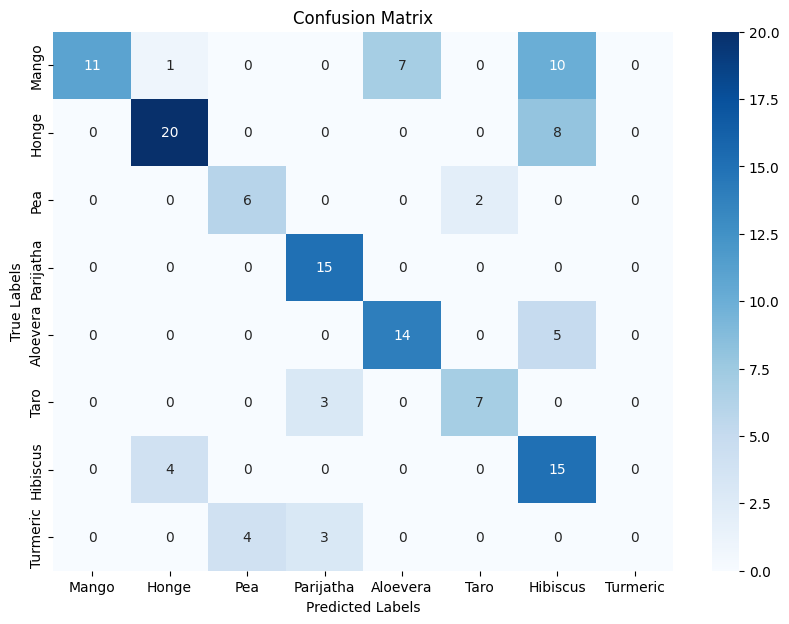

In [ ]:
import tensorflow as tf
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Helper function for evaluation
def evaluate_model(model, X_test, y_test, class_names):
    y_pred = np.argmax(model.predict(X_test), axis=1)

    # Ensure target names match the unique classes in the training set
    labels = np.arange(len(class_names))  # Assume class labels are 0 to N-1
    target_names = class_names

    print("Classification Report:\n", classification_report(y_test, y_pred, labels=labels, target_names=target_names, zero_division=0))
    print("Accuracy:", accuracy_score(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=target_names, yticklabels=target_names, cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Improved CNN Architecture
def build_better_cnn(input_shape, num_classes):
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=input_shape),
        tf.keras.layers.BatchNormalization(),  # Normalizes input to avoid large gradients
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.3),  # Regularization to avoid overfitting
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(num_classes, activation='softmax')  # Softmax for multi-class classification
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Adam optimizer with a lower learning rate
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Load the data
X = np.load("/content/combined_features.npy")
y = np.load("/content/combined_labels.npy")

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the improved CNN
input_shape = (X_train.shape[1],)
model = build_better_cnn(input_shape, num_classes=len(categories))

history = model.fit(X_train, y_train,
                    epochs=20,  # Increased epochs for better learning
                    batch_size=64,  # Larger batch size for faster training
                    validation_split=0.2,
                    verbose=1)

evaluate_model(model, X_test, y_test, categories)